DANH SÁCH THÀNH VIÊN NHÓM 16

- K204110562 - Lê Thảo Giang
- K204110567 - Phạm Thị Minh Hòa
- K204110586 - Lê Phước Toàn
- K204110588 - Nguyễn Thị Bảo Trâm
- K204111792 - Thẩm Thị Tú Uyên


# I.Tiền xử lý dữ liệu


IMPORT THƯ VIỆN

In [2]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
from bs4 import BeautifulSoup
pd.options.mode.chained_assignment = None
from re import sub
import csv
import html as ihtml

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv ('/content/drive/Shareddrives/PHÂN TÍCH DỮ LIỆU WEB/Đồ án/TECH/Dataset/Dataset_Comments_Final.csv')

In [4]:
df

,Author,Comment,Likes,Time,Video_id
0,just dead now,"given its indonesian, the lgbt rep was so good!",0,2023-09-19T05:14:38Z,RfwlJqZbaew
1,The Ohio God,I saw this and was expecting to see a child wi...,1,2023-07-28T06:46:55Z,RfwlJqZbaew
2,Ari Soul Art,Pensé que era el tráiler de Dear David <br>La ...,0,2023-07-24T04:04:41Z,RfwlJqZbaew
3,ColdMask,wrong movie,5,2023-07-20T19:46:32Z,RfwlJqZbaew
4,BrettGaming,Where’s the little funny ghost man,8,2023-07-11T01:02:59Z,RfwlJqZbaew
...,...,...,...,...,...
366040,Darius Gunter,season one was good but nothing I would evenm ...,0,2023-06-08T19:39:23Z,SzS8Ao0H6Co
366041,Ferose Khan,🇮🇳,0,2023-06-08T19:30:44Z,SzS8Ao0H6Co
366042,DOOM Studios,This final season looks great…,15,2023-06-08T19:30:44Z,SzS8Ao0H6Co
366043,Pénzes Dominik,First,1,2023-06-08T19:30:35Z,SzS8Ao0H6Co


## 1. XÓA URL

In [5]:
df["Comment"] = df["Comment"].astype(str)

In [6]:
def clean_text(text):
    text = BeautifulSoup(ihtml.unescape(text)).text
    text = re.sub(r"http[s]?://\S+", "", text)
    text = re.sub(r"\s+", " ", text)
    return text

In [7]:
for i in range(len(df)):
  df.Comment[i]=clean_text(df.Comment[i])

<ipython-input-6-8165d32eb4a1>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(ihtml.unescape(text)).text


In [8]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
for i in range(len(df)):
  df.Comment[i]=remove_urls(df.Comment[i])

In [9]:
df.Comment

0           given its indonesian, the lgbt rep was so good!
1         I saw this and was expecting to see a child wi...
2         Pensé que era el tráiler de Dear David La hist...
3                                               wrong movie
4                        Where’s the little funny ghost man
                                ...                        
366040    season one was good but nothing I would evenm ...
366041                                                   🇮🇳
366042                       This final season looks great…
366043                                                First
366044                                          1st comment
Name: Comment, Length: 366045, dtype: object

## 2. Xóa tag HTML

In [10]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

df["Comment"] = df["Comment"].apply(lambda text: remove_html(text))
df.head()

,Author,Comment,Likes,Time,Video_id
0,just dead now,"given its indonesian, the lgbt rep was so good!",0,2023-09-19T05:14:38Z,RfwlJqZbaew
1,The Ohio God,I saw this and was expecting to see a child wi...,1,2023-07-28T06:46:55Z,RfwlJqZbaew
2,Ari Soul Art,Pensé que era el tráiler de Dear David La hist...,0,2023-07-24T04:04:41Z,RfwlJqZbaew
3,ColdMask,wrong movie,5,2023-07-20T19:46:32Z,RfwlJqZbaew
4,BrettGaming,Where’s the little funny ghost man,8,2023-07-11T01:02:59Z,RfwlJqZbaew


## 3. Chuyển về từ thường, chuẩn hóa từ viết tắt (chatwords + contractions)

Expand Constraction

In [11]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "i'd": "i would", "i'd've": "i would have","i'll": "i will",
                     "i'll've": "i will have","i'm": "i am","i've": "i have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['Comment']=df['Comment'].apply(lambda x:expand_contractions(x))

In [12]:
df

,Author,Comment,Likes,Time,Video_id
0,just dead now,"given its indonesian, the lgbt rep was so good!",0,2023-09-19T05:14:38Z,RfwlJqZbaew
1,The Ohio God,I saw this and was expecting to see a child wi...,1,2023-07-28T06:46:55Z,RfwlJqZbaew
2,Ari Soul Art,Pensé que era el tráiler de Dear David La hist...,0,2023-07-24T04:04:41Z,RfwlJqZbaew
3,ColdMask,wrong movie,5,2023-07-20T19:46:32Z,RfwlJqZbaew
4,BrettGaming,Where’s the little funny ghost man,8,2023-07-11T01:02:59Z,RfwlJqZbaew
...,...,...,...,...,...
366040,Darius Gunter,season one was good but nothing I would evenm ...,0,2023-06-08T19:39:23Z,SzS8Ao0H6Co
366041,Ferose Khan,🇮🇳,0,2023-06-08T19:30:44Z,SzS8Ao0H6Co
366042,DOOM Studios,This final season looks great…,15,2023-06-08T19:30:44Z,SzS8Ao0H6Co
366043,Pénzes Dominik,First,1,2023-06-08T19:30:35Z,SzS8Ao0H6Co


in lớn để chat word

In [13]:
df["Comment"] = df["Comment"].str.upper()
df.Comment

0           GIVEN ITS INDONESIAN, THE LGBT REP WAS SO GOOD!
1         I SAW THIS AND WAS EXPECTING TO SEE A CHILD WI...
2         PENSÉ QUE ERA EL TRÁILER DE DEAR DAVID LA HIST...
3                                               WRONG MOVIE
4                        WHERE’S THE LITTLE FUNNY GHOST MAN
                                ...                        
366040    SEASON ONE WAS GOOD BUT NOTHING I WOULD EVENM ...
366041                                                   🇮🇳
366042                       THIS FINAL SEASON LOOKS GREAT…
366043                                                FIRST
366044                                          1ST COMMENT
Name: Comment, Length: 366045, dtype: object

Chuẩn hóa 1 số từ viết tắt

In [14]:
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
&=and
"""

In [15]:
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [16]:
for i in range(len(df)):
  df.Comment[i]=chat_words_conversion(df.Comment[i])

Đưa dữ liệu về chữ thường

In [17]:
df["Comment"] = df["Comment"].str.lower()
df.Comment

0           given its indonesian, the lgbt rep was so good!
1         i saw this and was expecting to see a child wi...
2         pensé que era el tráiler de dear david la hist...
3                                               wrong movie
4                        where’s the little funny ghost man
                                ...                        
366040    season one was good but nothing i would evenm ...
366041                                                   🇮🇳
366042                       this final season looks great…
366043                                                first
366044                                          1st comment
Name: Comment, Length: 366045, dtype: object

In [18]:
from itertools import groupby

In [19]:
def remove_repeatcharacter(text):
    return ''.join(''.join(s)[:2] for _, s in groupby(text))
df["Comment"] = df["Comment"].apply(lambda text: remove_repeatcharacter(text))

In [20]:
# remove tag @username
df["Comment"] = df["Comment"].str.replace("@[A-Za-z0-9]+","")

<ipython-input-20-962ad13506e6>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Comment"] = df["Comment"].str.replace("@[A-Za-z0-9]+","")


In [21]:
df

,Author,Comment,Likes,Time,Video_id
0,just dead now,"given its indonesian, the lgbt rep was so good!",0,2023-09-19T05:14:38Z,RfwlJqZbaew
1,The Ohio God,i saw this and was expecting to see a child wi...,1,2023-07-28T06:46:55Z,RfwlJqZbaew
2,Ari Soul Art,pensé que era el tráiler de dear david la hist...,0,2023-07-24T04:04:41Z,RfwlJqZbaew
3,ColdMask,wrong movie,5,2023-07-20T19:46:32Z,RfwlJqZbaew
4,BrettGaming,where’s the little funny ghost man,8,2023-07-11T01:02:59Z,RfwlJqZbaew
...,...,...,...,...,...
366040,Darius Gunter,season one was good but nothing i would evenm ...,0,2023-06-08T19:39:23Z,SzS8Ao0H6Co
366041,Ferose Khan,🇮🇳,0,2023-06-08T19:30:44Z,SzS8Ao0H6Co
366042,DOOM Studios,this final season looks great…,15,2023-06-08T19:30:44Z,SzS8Ao0H6Co
366043,Pénzes Dominik,first,1,2023-06-08T19:30:35Z,SzS8Ao0H6Co


## 4. Chuyển emoji, emoticon về dạng chữ 

In [22]:
!pip install emot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 637.5 kB/s eta 0:00:00


In [23]:
import re
from emot.emo_unicode import EMOTICONS_EMO
def convert_emoticons(text):
    for emot in EMOTICONS_EMO:
        text = text.replace(emot, " ".join(EMOTICONS_EMO[emot].replace(",","").replace(":","").split()))
    return text

convert_emoticons(":) 😊")

'Happy face or smiley 😊'

In [24]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 2.9 MB/s eta 0:00:00


In [25]:
pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 681.8 kB/s eta 0:00:00


In [26]:
import emoji
def extract_emojis(text):
     new_text = []
     new_text.append(emoji.demojize(text, delimiters=("", "")))
     return " ".join(new_text)

In [27]:
extract_emojis("😊")

'smiling_face_with_smiling_eyes'

In [28]:
for i in range(len(df)):
  df.Comment[i]=extract_emojis(df.Comment[i])

In [29]:
df['Comment'] = df['Comment'].str.replace("_", " ")

In [30]:
df['Comment'] = df['Comment'].str.replace("-", " ")

In [31]:
df['Comment'] = df['Comment'].str.replace("  ", " ")

In [32]:
df.Comment= df.Comment.str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
df.Comment

<ipython-input-32-4021fc30aab1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.Comment= df.Comment.str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')


0           given its indonesian, the lgbt rep was so good!
1          saw this and was expecting to see child with ...
2         pensé que era el tráiler de dear david la hist...
3                                               wrong movie
4                         where’ the little funny ghost man
                                ...                        
366040    season one was good but nothing would evenm sa...
366041                                                India
366042                       this final season looks great…
366043                                                first
366044                                          1st comment
Name: Comment, Length: 366045, dtype: object

## 5. Đưa từ về nguyên mẫu 

In [33]:
# lemmatize words with spacy
import spacy
nlp = spacy.load('en_core_web_sm')
def lemmatize_words(text):
    return " ".join([token.lemma_ for token in nlp(text)])
text = "last day i did homework, walked . now i am going to work. today he goes to school, police walks to school"
lemmatize_words(text)
# apply lemmatize_words function to comment column
df["Comment"] = df["Comment"].apply(lambda text: lemmatize_words(text))

## 6. Xóa số, dấu câu, ký tự lạ

In [34]:
df['Comment'] = df['Comment'].str.replace('\d+', '')
df.Comment

<ipython-input-34-4c3a13f0d8aa>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Comment'] = df['Comment'].str.replace('\d+', '')


0           give its indonesian , the lgbt rep be so good !
1           see this and be expect to see child with den...
2         pensé que era el tráiler de dear david la hist...
3                                               wrong movie
4                        where ' the little funny ghost man
                                ...                        
366040    season one be good but nothing would evenm say...
366041                                                India
366042                       this final season look great …
366043                                                first
366044                                           st comment
Name: Comment, Length: 366045, dtype: object

In [35]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["Comment"] = df["Comment"].apply(lambda text: remove_punctuation(text))


In [36]:
df.Comment

0             give its indonesian  the lgbt rep be so good 
1           see this and be expect to see child with den...
2         pensé que era el tráiler de dear david la hist...
3                                               wrong movie
4                         where  the little funny ghost man
                                ...                        
366040    season one be good but nothing would evenm say...
366041                                                India
366042                       this final season look great …
366043                                                first
366044                                           st comment
Name: Comment, Length: 366045, dtype: object

## 7. Xóa từ dừng (stopwords)

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [39]:
# stop_words = stopwords.words('english').remove("not", "no", "never", "nor", "but","too", "very", "can", "but", "very", "just", "don", "doesn", "didn", "wasn", "weren", "isn", "aren", "haven", "hasn", "hadn", "won", "wouldn", "shouldn", "couldn", "mustn", "mightn", "needn", "shan",  "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't")
# stop_words
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
all_stopwords.remove('nor')
all_stopwords.remove('no')
all_stopwords.remove('but')
all_stopwords.remove('too')
all_stopwords.remove('very')
all_stopwords.remove('just')
all_stopwords.remove('don')
all_stopwords.remove('doesn')
all_stopwords.remove('didn')
all_stopwords.remove('wasn')
all_stopwords.remove('weren')
all_stopwords.remove('isn')
all_stopwords.remove('aren')
all_stopwords.remove('haven')
all_stopwords.remove('hasn')
all_stopwords.remove('hadn')
all_stopwords.remove('won')
all_stopwords.remove('wouldn')
all_stopwords.remove('shouldn')
all_stopwords.remove('couldn')
all_stopwords.remove('mustn')
all_stopwords.remove('mightn')
all_stopwords.remove('needn')
all_stopwords.remove('shan')
print(all_stopwords)



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 's', 't', 'can', 'will', "do

In [40]:
# remove stopwords in all_stopwords
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in all_stopwords])
text= "i dont like he because he is bad not do it please don't"
remove_stopwords(text)

'dont like bad not please'

In [41]:
df["Comment"] = df["Comment"].apply(lambda text: remove_stopwords(text))

Remove ký tự lạ, ko xóa white space

In [42]:
df['Comment']=df['Comment'].str.replace('[^\w\s]', '')
#show comment
df.Comment

<ipython-input-42-4bde66fceb83>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Comment']=df['Comment'].str.replace('[^\w\s]', '')


0                             give indonesian lgbt rep good
1                            see expect see child dent head
2         pensé que era el tráiler de dear david la hist...
3                                               wrong movie
4                                    little funny ghost man
                                ...                        
366040    season one good but nothing would evenm say cl...
366041                                                India
366042                             final season look great 
366043                                                first
366044                                           st comment
Name: Comment, Length: 366045, dtype: object

In [43]:
#remove character 1 word nonsens
df['Comment'] = df['Comment'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
#show change after remove character 1 word nonsens
df.Comment

0                             give indonesian lgbt rep good
1                            see expect see child dent head
2         pensé que era el tráiler de dear david la hist...
3                                               wrong movie
4                                    little funny ghost man
                                ...                        
366040    season one good but nothing would evenm say cl...
366041                                                India
366042                              final season look great
366043                                                first
366044                                           st comment
Name: Comment, Length: 366045, dtype: object

## 8. Kiểm tra ngôn ngữ, loại bỏ ngôn ngữ không phải tiếng Anh 

In [44]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=287d9fc74fe0ceff8ad53b0f60ed49caa8b6a30c5c9aa48fed1bc65158433359
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [45]:
import pandas as pd
from langdetect import detect
import html

def is_english(comment):
    try:
        return detect(comment) == 'en'
    except:
        return False

df['is_english'] = df['Comment'].apply(is_english)
df.reset_index(drop=True, inplace=True)
df


,Author,Comment,Likes,Time,Video_id,is_english
0,just dead now,give indonesian lgbt rep good,0,2023-09-19T05:14:38Z,RfwlJqZbaew,False
1,The Ohio God,see expect see child dent head,1,2023-07-28T06:46:55Z,RfwlJqZbaew,False
2,Ari Soul Art,pensé que era el tráiler de dear david la hist...,0,2023-07-24T04:04:41Z,RfwlJqZbaew,False
3,ColdMask,wrong movie,5,2023-07-20T19:46:32Z,RfwlJqZbaew,True
4,BrettGaming,little funny ghost man,8,2023-07-11T01:02:59Z,RfwlJqZbaew,True
...,...,...,...,...,...,...
366040,Darius Gunter,season one good but nothing would evenm say cl...,0,2023-06-08T19:39:23Z,SzS8Ao0H6Co,True
366041,Ferose Khan,India,0,2023-06-08T19:30:44Z,SzS8Ao0H6Co,False
366042,DOOM Studios,final season look great,15,2023-06-08T19:30:44Z,SzS8Ao0H6Co,True
366043,Pénzes Dominik,first,1,2023-06-08T19:30:35Z,SzS8Ao0H6Co,True


## 9. Xóa giá trị rỗng

In [46]:
#check and remove null value
df.isnull().sum()

Author        106
Comment         0
Likes           0
Time            0
Video_id        0
is_english      0
dtype: int64

In [47]:
#remove null value
df.dropna(inplace=True)
df.isnull().sum()

Author        0
Comment       0
Likes         0
Time          0
Video_id      0
is_english    0
dtype: int64

In [48]:
#set NaN value
df['Comment'] = df['Comment'].replace('', np.nan)
df.isnull().sum()

Author           0
Comment       2640
Likes            0
Time             0
Video_id         0
is_english       0
dtype: int64

In [49]:
df

,Author,Comment,Likes,Time,Video_id,is_english
0,just dead now,give indonesian lgbt rep good,0,2023-09-19T05:14:38Z,RfwlJqZbaew,False
1,The Ohio God,see expect see child dent head,1,2023-07-28T06:46:55Z,RfwlJqZbaew,False
2,Ari Soul Art,pensé que era el tráiler de dear david la hist...,0,2023-07-24T04:04:41Z,RfwlJqZbaew,False
3,ColdMask,wrong movie,5,2023-07-20T19:46:32Z,RfwlJqZbaew,True
4,BrettGaming,little funny ghost man,8,2023-07-11T01:02:59Z,RfwlJqZbaew,True
...,...,...,...,...,...,...
366040,Darius Gunter,season one good but nothing would evenm say cl...,0,2023-06-08T19:39:23Z,SzS8Ao0H6Co,True
366041,Ferose Khan,India,0,2023-06-08T19:30:44Z,SzS8Ao0H6Co,False
366042,DOOM Studios,final season look great,15,2023-06-08T19:30:44Z,SzS8Ao0H6Co,True
366043,Pénzes Dominik,first,1,2023-06-08T19:30:35Z,SzS8Ao0H6Co,True


In [50]:
#remove NaN value
df.dropna(inplace=True)
df.isnull().sum()

Author        0
Comment       0
Likes         0
Time          0
Video_id      0
is_english    0
dtype: int64

In [51]:
df

,Author,Comment,Likes,Time,Video_id,is_english
0,just dead now,give indonesian lgbt rep good,0,2023-09-19T05:14:38Z,RfwlJqZbaew,False
1,The Ohio God,see expect see child dent head,1,2023-07-28T06:46:55Z,RfwlJqZbaew,False
2,Ari Soul Art,pensé que era el tráiler de dear david la hist...,0,2023-07-24T04:04:41Z,RfwlJqZbaew,False
3,ColdMask,wrong movie,5,2023-07-20T19:46:32Z,RfwlJqZbaew,True
4,BrettGaming,little funny ghost man,8,2023-07-11T01:02:59Z,RfwlJqZbaew,True
...,...,...,...,...,...,...
366040,Darius Gunter,season one good but nothing would evenm say cl...,0,2023-06-08T19:39:23Z,SzS8Ao0H6Co,True
366041,Ferose Khan,India,0,2023-06-08T19:30:44Z,SzS8Ao0H6Co,False
366042,DOOM Studios,final season look great,15,2023-06-08T19:30:44Z,SzS8Ao0H6Co,True
366043,Pénzes Dominik,first,1,2023-06-08T19:30:35Z,SzS8Ao0H6Co,True


In [52]:
#show row in df
df.shape

(363299, 6)

In [53]:
df = df.reset_index()

In [54]:
#to lower case
df['Comment'] = df['Comment'].str.lower()
df.Comment[19]

'anyone think give whattpad vibe'

In [55]:
df.dtypes

index          int64
Author        object
Comment       object
Likes          int64
Time          object
Video_id      object
is_english      bool
dtype: object

In [56]:
#Time coulumn to datetime
df['Time'] = pd.to_datetime(df['Time'])
df.dtypes

index                       int64
Author                     object
Comment                    object
Likes                       int64
Time          datetime64[ns, UTC]
Video_id                   object
is_english                   bool
dtype: object

In [57]:
df

,index,Author,Comment,Likes,Time,Video_id,is_english
0,0,just dead now,give indonesian lgbt rep good,0,2023-09-19 05:14:38+00:00,RfwlJqZbaew,False
1,1,The Ohio God,see expect see child dent head,1,2023-07-28 06:46:55+00:00,RfwlJqZbaew,False
2,2,Ari Soul Art,pensé que era el tráiler de dear david la hist...,0,2023-07-24 04:04:41+00:00,RfwlJqZbaew,False
3,3,ColdMask,wrong movie,5,2023-07-20 19:46:32+00:00,RfwlJqZbaew,True
4,4,BrettGaming,little funny ghost man,8,2023-07-11 01:02:59+00:00,RfwlJqZbaew,True
...,...,...,...,...,...,...,...
363294,366040,Darius Gunter,season one good but nothing would evenm say cl...,0,2023-06-08 19:39:23+00:00,SzS8Ao0H6Co,True
363295,366041,Ferose Khan,india,0,2023-06-08 19:30:44+00:00,SzS8Ao0H6Co,False
363296,366042,DOOM Studios,final season look great,15,2023-06-08 19:30:44+00:00,SzS8Ao0H6Co,True
363297,366043,Pénzes Dominik,first,1,2023-06-08 19:30:35+00:00,SzS8Ao0H6Co,True


In [59]:
df.to_csv('FinalPreprocess.csv', index=False)

In [3]:
df=pd.read_csv('FinalPreprocess.csv')

In [4]:
df

,index,Author,Comment,Likes,Time,Video_id,is_english
0,0,just dead now,give indonesian lgbt rep good,0,2023-09-19 05:14:38+00:00,RfwlJqZbaew,False
1,1,The Ohio God,see expect see child dent head,1,2023-07-28 06:46:55+00:00,RfwlJqZbaew,False
2,2,Ari Soul Art,pensé que era el tráiler de dear david la hist...,0,2023-07-24 04:04:41+00:00,RfwlJqZbaew,False
3,3,ColdMask,wrong movie,5,2023-07-20 19:46:32+00:00,RfwlJqZbaew,True
4,4,BrettGaming,little funny ghost man,8,2023-07-11 01:02:59+00:00,RfwlJqZbaew,True
...,...,...,...,...,...,...,...
363294,366040,Darius Gunter,season one good but nothing would evenm say cl...,0,2023-06-08 19:39:23+00:00,SzS8Ao0H6Co,True
363295,366041,Ferose Khan,india,0,2023-06-08 19:30:44+00:00,SzS8Ao0H6Co,False
363296,366042,DOOM Studios,final season look great,15,2023-06-08 19:30:44+00:00,SzS8Ao0H6Co,True
363297,366043,Pénzes Dominik,first,1,2023-06-08 19:30:35+00:00,SzS8Ao0H6Co,True


In [5]:
#drop is_english=False
df.drop(df[df['is_english']==False].index, inplace=True)
df

,index,Author,Comment,Likes,Time,Video_id,is_english
3,3,ColdMask,wrong movie,5,2023-07-20 19:46:32+00:00,RfwlJqZbaew,True
4,4,BrettGaming,little funny ghost man,8,2023-07-11 01:02:59+00:00,RfwlJqZbaew,True
10,10,Wetskunk,wait not dear david twitter thread horror story,4,2023-06-24 11:24:42+00:00,RfwlJqZbaew,True
14,14,Andreas Supriyono,highly recommend,1,2023-05-23 15:02:00+00:00,RfwlJqZbaew,True
19,19,Chantal Ng,anyone think give whattpad vibe,1,2023-03-17 04:49:58+00:00,RfwlJqZbaew,True
...,...,...,...,...,...,...,...
363291,366037,remrocks,first,0,2023-06-08 19:30:48+00:00,SzS8Ao0H6Co,True
363293,366039,DragonHeart613,good but not masterpiece henry would not leave...,0,2023-06-08 19:34:32+00:00,SzS8Ao0H6Co,True
363294,366040,Darius Gunter,season one good but nothing would evenm say cl...,0,2023-06-08 19:39:23+00:00,SzS8Ao0H6Co,True
363296,366042,DOOM Studios,final season look great,15,2023-06-08 19:30:44+00:00,SzS8Ao0H6Co,True


In [6]:
#drop is_english column
df.drop(columns=['is_english'], inplace=True)
df

,index,Author,Comment,Likes,Time,Video_id
3,3,ColdMask,wrong movie,5,2023-07-20 19:46:32+00:00,RfwlJqZbaew
4,4,BrettGaming,little funny ghost man,8,2023-07-11 01:02:59+00:00,RfwlJqZbaew
10,10,Wetskunk,wait not dear david twitter thread horror story,4,2023-06-24 11:24:42+00:00,RfwlJqZbaew
14,14,Andreas Supriyono,highly recommend,1,2023-05-23 15:02:00+00:00,RfwlJqZbaew
19,19,Chantal Ng,anyone think give whattpad vibe,1,2023-03-17 04:49:58+00:00,RfwlJqZbaew
...,...,...,...,...,...,...
363291,366037,remrocks,first,0,2023-06-08 19:30:48+00:00,SzS8Ao0H6Co
363293,366039,DragonHeart613,good but not masterpiece henry would not leave...,0,2023-06-08 19:34:32+00:00,SzS8Ao0H6Co
363294,366040,Darius Gunter,season one good but nothing would evenm say cl...,0,2023-06-08 19:39:23+00:00,SzS8Ao0H6Co
363296,366042,DOOM Studios,final season look great,15,2023-06-08 19:30:44+00:00,SzS8Ao0H6Co


# II.EDA 

In [7]:
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

In [8]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [9]:
df

,index,Author,Comment,Likes,Time,Video_id
3,3,ColdMask,wrong movie,5,2023-07-20 19:46:32+00:00,RfwlJqZbaew
4,4,BrettGaming,little funny ghost man,8,2023-07-11 01:02:59+00:00,RfwlJqZbaew
10,10,Wetskunk,wait not dear david twitter thread horror story,4,2023-06-24 11:24:42+00:00,RfwlJqZbaew
14,14,Andreas Supriyono,highly recommend,1,2023-05-23 15:02:00+00:00,RfwlJqZbaew
19,19,Chantal Ng,anyone think give whattpad vibe,1,2023-03-17 04:49:58+00:00,RfwlJqZbaew
...,...,...,...,...,...,...
363291,366037,remrocks,first,0,2023-06-08 19:30:48+00:00,SzS8Ao0H6Co
363293,366039,DragonHeart613,good but not masterpiece henry would not leave...,0,2023-06-08 19:34:32+00:00,SzS8Ao0H6Co
363294,366040,Darius Gunter,season one good but nothing would evenm say cl...,0,2023-06-08 19:39:23+00:00,SzS8Ao0H6Co
363296,366042,DOOM Studios,final season look great,15,2023-06-08 19:30:44+00:00,SzS8Ao0H6Co


In [10]:
import numpy as np
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
#Check for null values
df.isnull().sum()

index       0
Author      0
Comment     0
Likes       0
Time        0
Video_id    0
dtype: int64

In [12]:
#Check for duplicates
df.duplicated().sum()

0

In [13]:
#Check for unique values
df.nunique()

index       257261
Author      174438
Comment     240277
Likes         1377
Time        252711
Video_id       292
dtype: int64

In [14]:
# Số ký tự
df ["char_count"] = df ["Comment"]. map (lambda x: len (x))
# Số lượng từ
df ["word_count"] = df ["Comment"]. map (lambda x: len (x.split ()))
# Đếm số câu
df ["sent_count"] = df ["Comment"]. map (lambda x: len (sent_tokenize (x)))
# Số chuỗi
df ["hashtag_count"] = df ["Comment"]. map (lambda x: x.count ("#"))
# Độ dài từ trung bình
df ["avg_word_len"] = df ["Comment"]. map (lambda x: np.mean ([len (w) for w in str (x) .split ()]))
# Độ dài câu trung bình
df ["avg_sent_len"] = df ["Comment"]. map (lambda x: np.mean ([len (w.split ()) for w in sent_tokenize (x)]))
df

,index,Author,Comment,Likes,Time,Video_id,char_count,word_count,sent_count,hashtag_count,avg_word_len,avg_sent_len
3,3,ColdMask,wrong movie,5,2023-07-20 19:46:32+00:00,RfwlJqZbaew,11,2,1,0,5.000000,2.0
4,4,BrettGaming,little funny ghost man,8,2023-07-11 01:02:59+00:00,RfwlJqZbaew,22,4,1,0,4.750000,4.0
10,10,Wetskunk,wait not dear david twitter thread horror story,4,2023-06-24 11:24:42+00:00,RfwlJqZbaew,47,8,1,0,5.000000,8.0
14,14,Andreas Supriyono,highly recommend,1,2023-05-23 15:02:00+00:00,RfwlJqZbaew,16,2,1,0,7.500000,2.0
19,19,Chantal Ng,anyone think give whattpad vibe,1,2023-03-17 04:49:58+00:00,RfwlJqZbaew,31,5,1,0,5.400000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
363291,366037,remrocks,first,0,2023-06-08 19:30:48+00:00,SzS8Ao0H6Co,5,1,1,0,5.000000,1.0
363293,366039,DragonHeart613,good but not masterpiece henry would not leave...,0,2023-06-08 19:34:32+00:00,SzS8Ao0H6Co,51,9,1,0,4.777778,9.0
363294,366040,Darius Gunter,season one good but nothing would evenm say cl...,0,2023-06-08 19:39:23+00:00,SzS8Ao0H6Co,172,28,1,0,5.178571,28.0
363296,366042,DOOM Studios,final season look great,15,2023-06-08 19:30:44+00:00,SzS8Ao0H6Co,23,4,1,0,5.000000,4.0


In [15]:
df.describe()

,index,Likes,char_count,word_count,sent_count,hashtag_count,avg_word_len,avg_sent_len
count,257261.000000,257261.000000,257261.000000,257261.000000,257261.0,257261.0,257261.000000,257261.000000
mean,182293.321561,15.152040,75.653181,12.221472,1.0,0.0,5.271371,12.221472
std,106368.080972,280.791957,108.626383,16.607761,0.0,0.0,1.004070,16.607761
min,3.000000,0.000000,3.000000,1.000000,1.0,0.0,2.000000,1.000000
25%,87463.000000,0.000000,29.000000,5.000000,1.0,0.0,4.666667,5.000000
50%,180337.000000,0.000000,50.000000,8.000000,1.0,0.0,5.166667,8.000000
75%,274828.000000,2.000000,87.000000,14.000000,1.0,0.0,5.714286,14.000000
max,366043.000000,50001.000000,12959.000000,2160.000000,1.0,0.0,112.000000,2160.000000


In [16]:
df.corr()

,index,Likes,char_count,word_count,sent_count,hashtag_count,avg_word_len,avg_sent_len
index,1.000000,-0.006604,-0.040423,-0.040966,NaN,NaN,-0.005186,-0.040966
Likes,-0.006604,1.000000,0.012381,0.012673,NaN,NaN,0.000824,0.012673
char_count,-0.040423,0.012381,1.000000,0.992388,NaN,NaN,0.060942,0.992388
word_count,-0.040966,0.012673,0.992388,1.000000,NaN,NaN,0.000467,1.000000
sent_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hashtag_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_word_len,-0.005186,0.000824,0.060942,0.000467,NaN,NaN,1.000000,0.000467
avg_sent_len,-0.040966,0.012673,0.992388,1.000000,NaN,NaN,0.000467,1.000000


<AxesSubplot:>

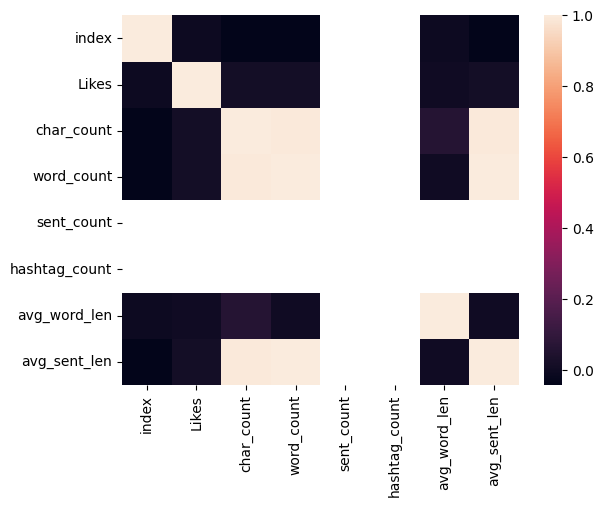

In [18]:
import seaborn as sns
sns.heatmap(df.corr())

<AxesSubplot:xlabel='word_count', ylabel='Count'>

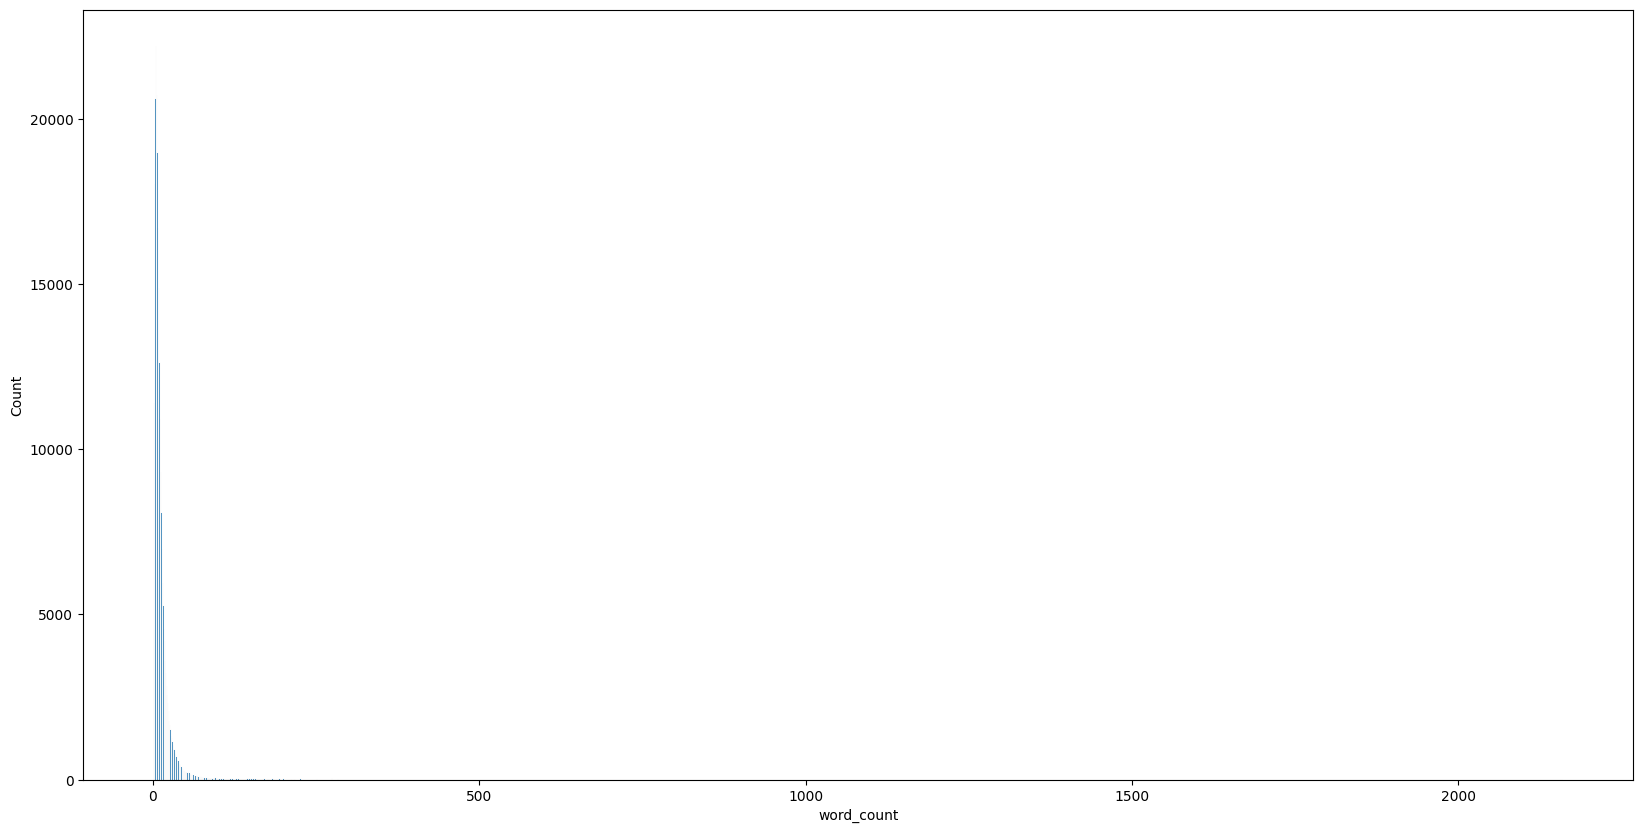

In [19]:
plt.figure(figsize =(20,10))
sns.histplot(data=df, x='word_count')

<AxesSubplot:xlabel='word_count', ylabel='Density'>

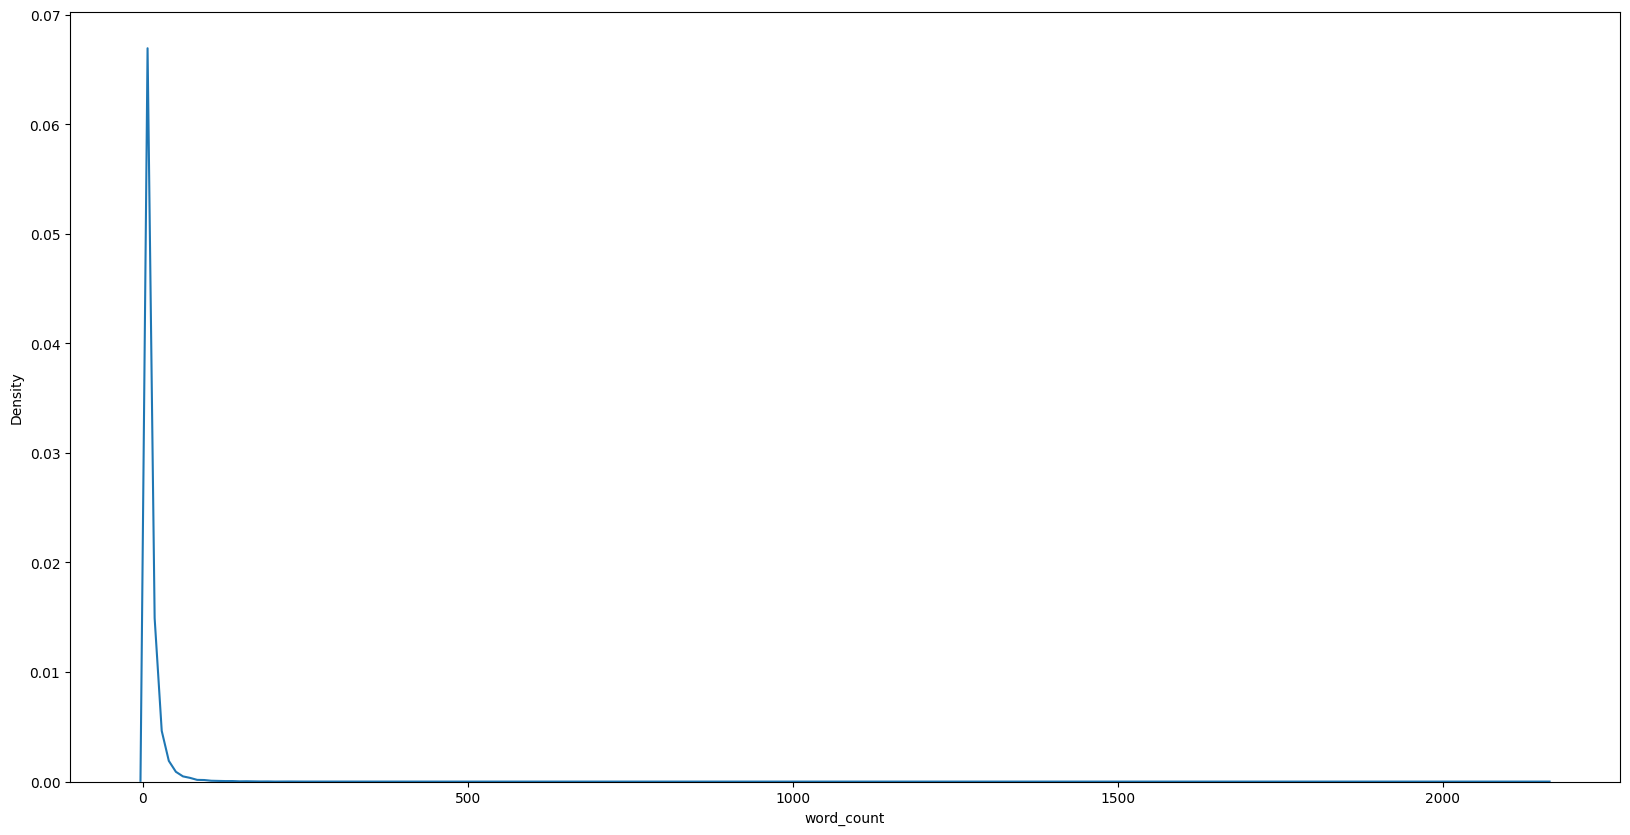

In [20]:
plt.figure(figsize =(20,10))
sns.kdeplot(data = df, x = 'word_count')

<AxesSubplot:xlabel='word_count'>

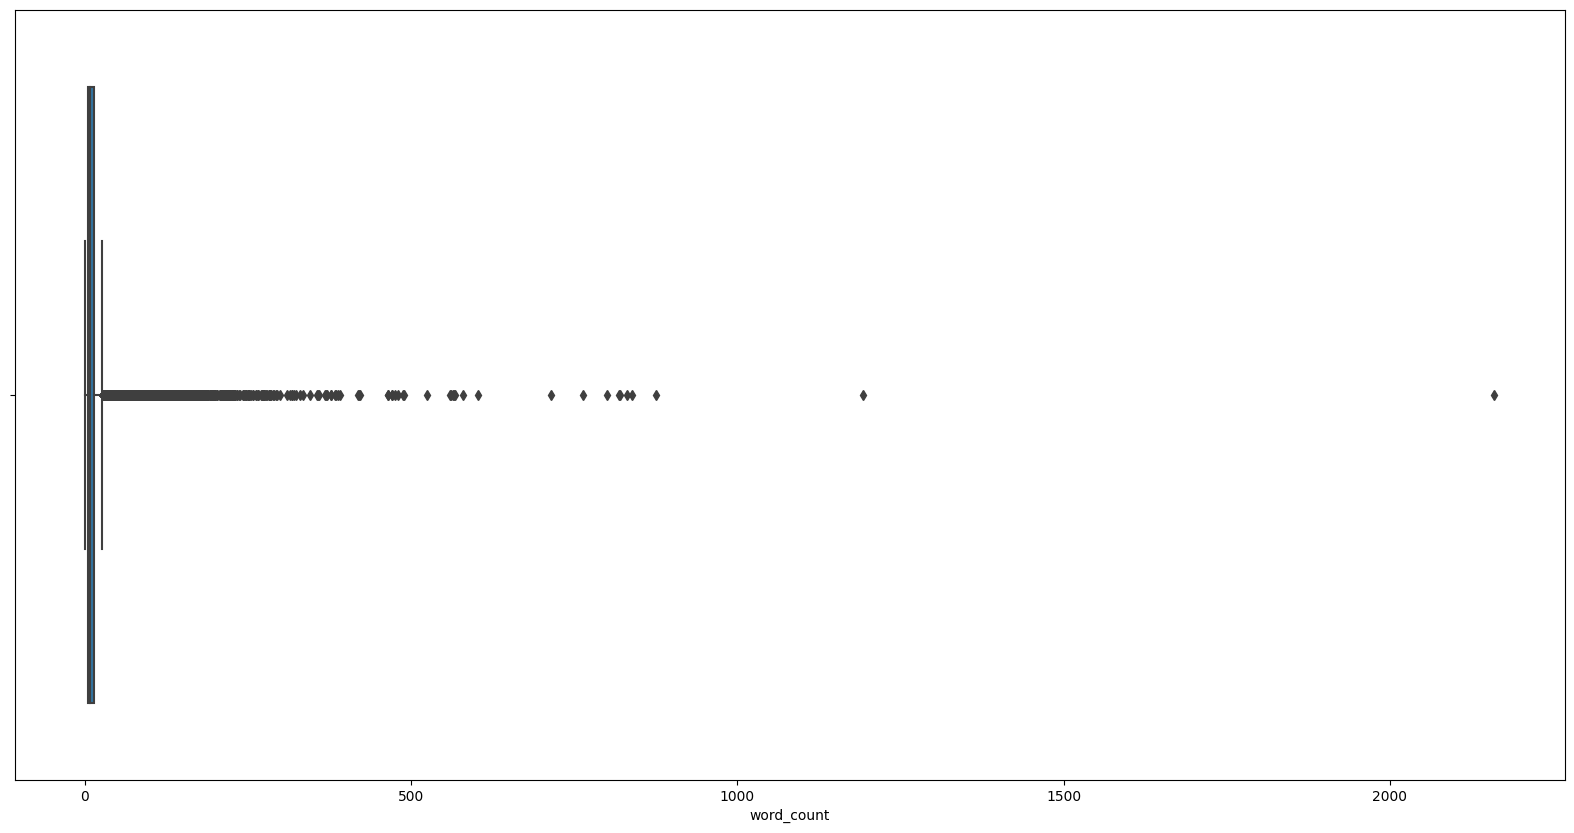

In [21]:
plt.figure(figsize =(20,10))
sns.boxplot (data = df,
            x = "word_count" )

## Thực hiện phương pháp IQR để phát hiện và xử lý các ngoại lệ.
Sử dụng IQR, chúng ta có thể làm theo cách tiếp cận dưới đây để thay thế các giá trị ngoại lệ bằng giá trị NULL:

* Tính phần tư thứ nhất và thứ ba (Q1 và Q3).
* Hơn nữa, hãy đánh giá phạm vi liên phần tư, IQR = Q3-Q1 .
* Ước tính giới hạn dưới, giới hạn dưới = Q1 * 1.5
* Ước tính giới hạn trên, giới hạn trên = Q3 * 1.5
* Thay thế các điểm dữ liệu nằm bên ngoài giới hạn dưới và giới hạn trên bằng giá trị NULL .



In [22]:
for x in ['word_count']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
    # max=50
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [24]:
df.isnull().sum()

index                0
Author               0
Comment              0
Likes                0
Time                 0
Video_id             0
char_count           0
word_count       19870
sent_count           0
hashtag_count        0
avg_word_len         0
avg_sent_len         0
dtype: int64

In [25]:
df1 = df[df.isna().any(axis=1)]
df1

,index,Author,Comment,Likes,Time,Video_id,char_count,word_count,sent_count,hashtag_count,avg_word_len,avg_sent_len
31,32,Incognito,love heroine imagination scene top notch cinem...,2,2023-02-23 16:24:00+00:00,RfwlJqZbaew,266,NaN,1,0,5.512195,41.0
33,34,Aishwarya Potdar,wattpad trauma real lolto young girl please wa...,125,2023-02-21 15:15:54+00:00,RfwlJqZbaew,679,NaN,1,0,5.666667,102.0
61,62,efendi efendi,dreamingparty popperparty popper love indonesi...,2,2023-02-14 12:17:53+00:00,RfwlJqZbaew,236,NaN,1,0,5.236842,38.0
84,86,Geyl,highly recommend film film not show thing actu...,129,2023-02-11 10:46:38+00:00,RfwlJqZbaew,332,NaN,1,0,5.283019,53.0
237,240,Danny Ruley,watch movie last night enjoy writer producer g...,0,2023-07-21 16:42:30+00:00,2stkk0yy0ao,207,NaN,1,0,5.933333,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...
362967,365710,Ninjamaster227,sad person give shit go nowthe audience just l...,0,2023-06-08 19:42:37+00:00,SzS8Ao0H6Co,227,NaN,1,0,5.000000,38.0
362982,365725,Jonathan Evans,henry just absolutely incredible geralt loudly...,4,2023-06-08 19:40:54+00:00,SzS8Ao0H6Co,204,NaN,1,0,6.068966,29.0
363020,365763,MrJayza89,munit already different source exactly get bad...,5,2023-06-08 21:52:22+00:00,SzS8Ao0H6Co,221,NaN,1,0,5.529412,34.0
363113,365857,DragonHeart613,final season periodno one want hemsworth broth...,0,2023-06-08 19:33:46+00:00,SzS8Ao0H6Co,200,NaN,1,0,5.483871,31.0


In [26]:
df.isnull()

,index,Author,Comment,Likes,Time,Video_id,char_count,word_count,sent_count,hashtag_count,avg_word_len,avg_sent_len
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False,False,False
19,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
363291,False,False,False,False,False,False,False,False,False,False,False,False
363293,False,False,False,False,False,False,False,False,False,False,False,False
363294,False,False,False,False,False,False,False,True,False,False,False,False
363296,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
df = df.dropna(axis = 0)
df

,index,Author,Comment,Likes,Time,Video_id,char_count,word_count,sent_count,hashtag_count,avg_word_len,avg_sent_len
3,3,ColdMask,wrong movie,5,2023-07-20 19:46:32+00:00,RfwlJqZbaew,11,2.0,1,0,5.000000,2.0
4,4,BrettGaming,little funny ghost man,8,2023-07-11 01:02:59+00:00,RfwlJqZbaew,22,4.0,1,0,4.750000,4.0
10,10,Wetskunk,wait not dear david twitter thread horror story,4,2023-06-24 11:24:42+00:00,RfwlJqZbaew,47,8.0,1,0,5.000000,8.0
14,14,Andreas Supriyono,highly recommend,1,2023-05-23 15:02:00+00:00,RfwlJqZbaew,16,2.0,1,0,7.500000,2.0
19,19,Chantal Ng,anyone think give whattpad vibe,1,2023-03-17 04:49:58+00:00,RfwlJqZbaew,31,5.0,1,0,5.400000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
363290,366036,Supritam Chattopadhyay,witcher back,0,2023-06-08 19:30:50+00:00,SzS8Ao0H6Co,12,2.0,1,0,5.500000,2.0
363291,366037,remrocks,first,0,2023-06-08 19:30:48+00:00,SzS8Ao0H6Co,5,1.0,1,0,5.000000,1.0
363293,366039,DragonHeart613,good but not masterpiece henry would not leave...,0,2023-06-08 19:34:32+00:00,SzS8Ao0H6Co,51,9.0,1,0,4.777778,9.0
363296,366042,DOOM Studios,final season look great,15,2023-06-08 19:30:44+00:00,SzS8Ao0H6Co,23,4.0,1,0,5.000000,4.0


<AxesSubplot:xlabel='word_count'>

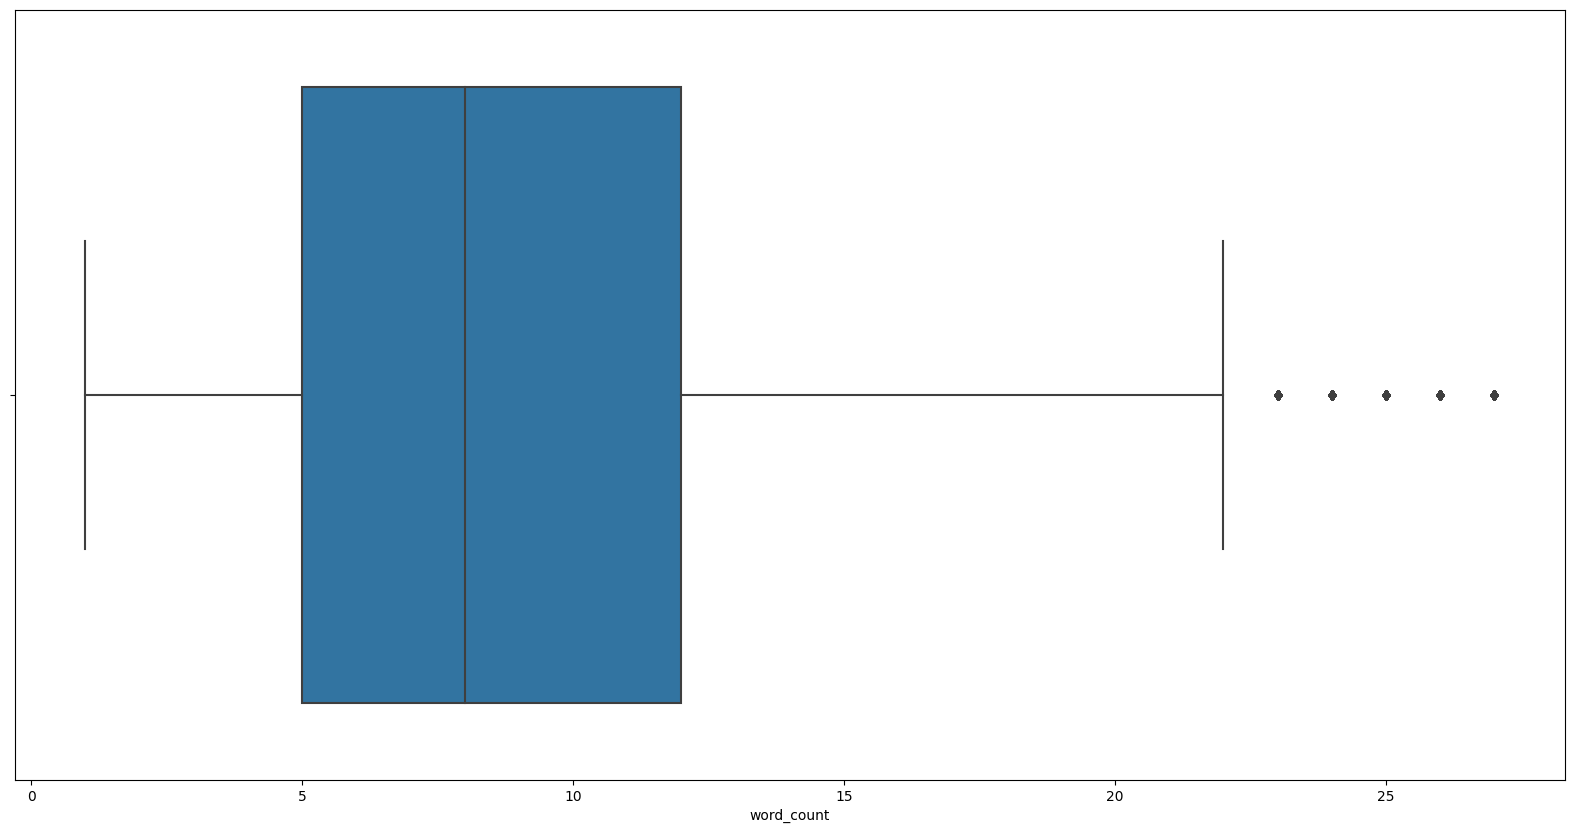

In [28]:
plt.figure(figsize =(20,10))
sns.boxplot (data = df,
            x = "word_count" )

<AxesSubplot:xlabel='Likes'>

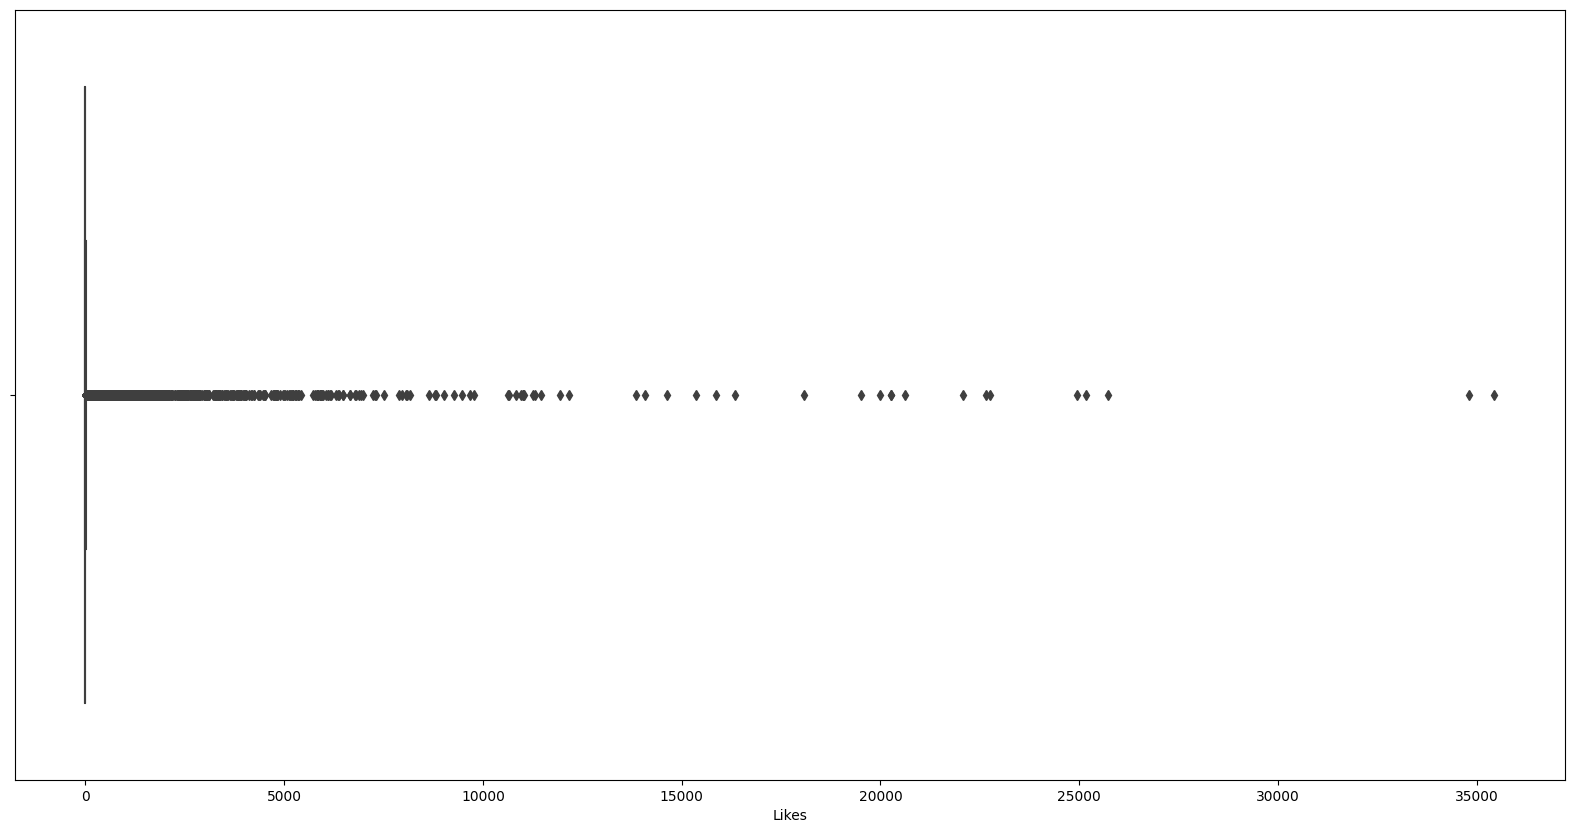

In [29]:
plt.figure(figsize =(20,10))
sns.boxplot (data = df,
            x = "Likes" )

In [30]:
df.describe()

,index,Likes,char_count,word_count,sent_count,hashtag_count,avg_word_len,avg_sent_len
count,237391.000000,237391.000000,237391.000000,237391.000000,237391.0,237391.0,237391.000000,237391.000000
mean,183587.183844,14.501148,55.774082,9.121753,1.0,0.0,5.264990,9.121753
std,106312.953941,266.177266,37.241519,5.847869,0.0,0.0,1.033679,5.847869
min,3.000000,0.000000,3.000000,1.000000,1.0,0.0,2.000000,1.000000
25%,89994.500000,0.000000,28.000000,5.000000,1.0,0.0,4.636364,5.000000
50%,182846.000000,0.000000,46.000000,8.000000,1.0,0.0,5.142857,8.000000
75%,276015.000000,2.000000,75.000000,12.000000,1.0,0.0,5.727273,12.000000
max,366043.000000,35442.000000,305.000000,27.000000,1.0,0.0,112.000000,27.000000


<AxesSubplot:xlabel='word_count', ylabel='Density'>

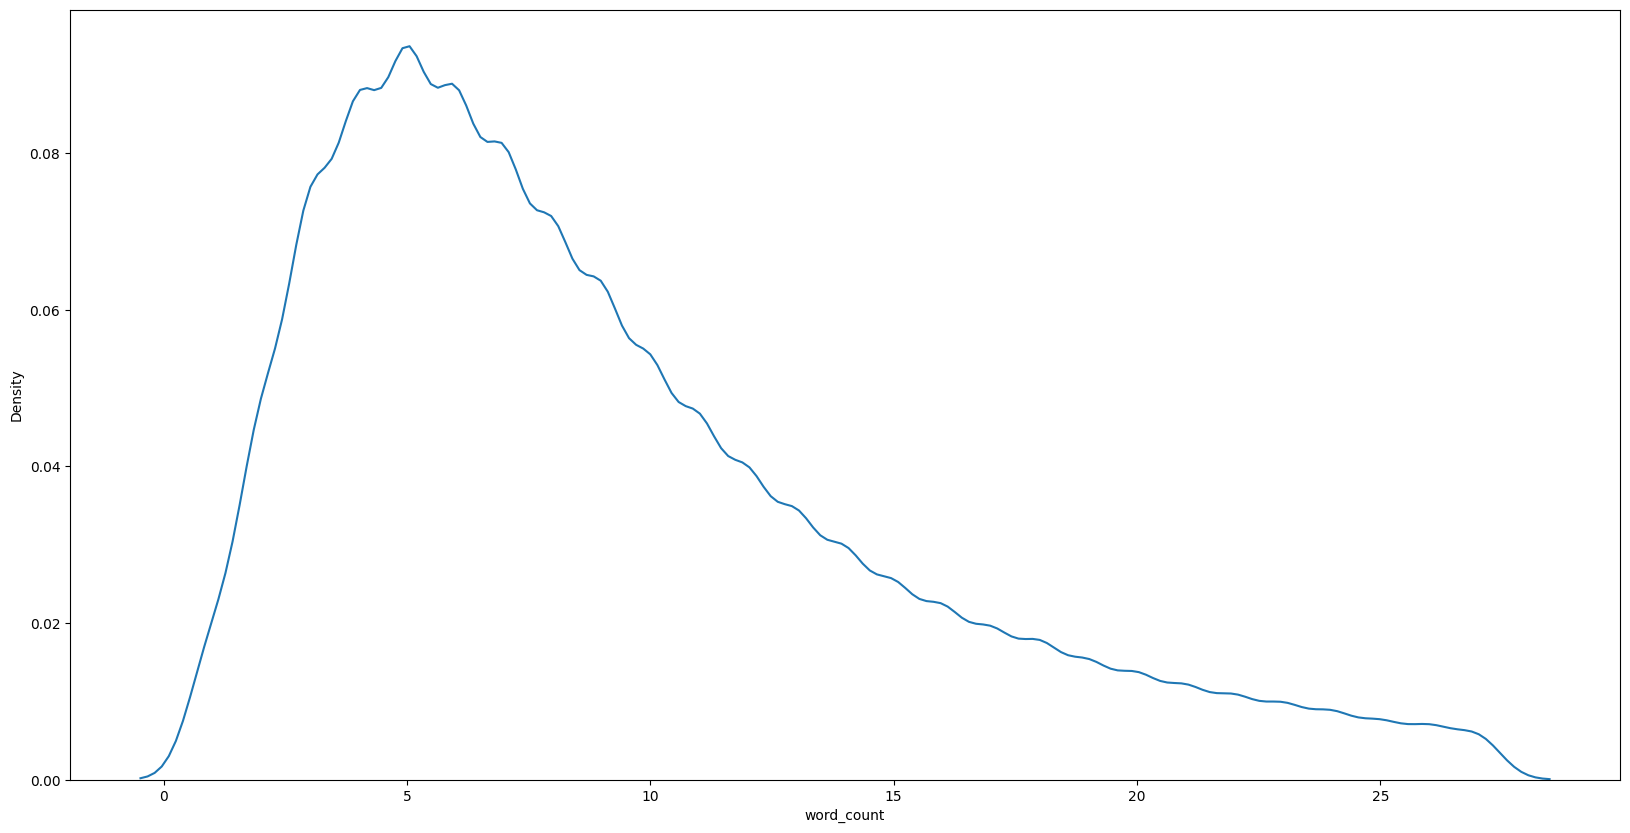

In [31]:
plt.figure(figsize =(20,10))
sns.kdeplot(data=df, x='word_count')

In [32]:
df

,index,Author,Comment,Likes,Time,Video_id,char_count,word_count,sent_count,hashtag_count,avg_word_len,avg_sent_len
3,3,ColdMask,wrong movie,5,2023-07-20 19:46:32+00:00,RfwlJqZbaew,11,2.0,1,0,5.000000,2.0
4,4,BrettGaming,little funny ghost man,8,2023-07-11 01:02:59+00:00,RfwlJqZbaew,22,4.0,1,0,4.750000,4.0
10,10,Wetskunk,wait not dear david twitter thread horror story,4,2023-06-24 11:24:42+00:00,RfwlJqZbaew,47,8.0,1,0,5.000000,8.0
14,14,Andreas Supriyono,highly recommend,1,2023-05-23 15:02:00+00:00,RfwlJqZbaew,16,2.0,1,0,7.500000,2.0
19,19,Chantal Ng,anyone think give whattpad vibe,1,2023-03-17 04:49:58+00:00,RfwlJqZbaew,31,5.0,1,0,5.400000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
363290,366036,Supritam Chattopadhyay,witcher back,0,2023-06-08 19:30:50+00:00,SzS8Ao0H6Co,12,2.0,1,0,5.500000,2.0
363291,366037,remrocks,first,0,2023-06-08 19:30:48+00:00,SzS8Ao0H6Co,5,1.0,1,0,5.000000,1.0
363293,366039,DragonHeart613,good but not masterpiece henry would not leave...,0,2023-06-08 19:34:32+00:00,SzS8Ao0H6Co,51,9.0,1,0,4.777778,9.0
363296,366042,DOOM Studios,final season look great,15,2023-06-08 19:30:44+00:00,SzS8Ao0H6Co,23,4.0,1,0,5.000000,4.0


In [33]:
#drop video id, char_count
df.drop(columns=['char_count','word_count','sent_count','hashtag_count','avg_word_len','avg_sent_len'], inplace=True)


In [34]:
df

,index,Author,Comment,Likes,Time,Video_id
3,3,ColdMask,wrong movie,5,2023-07-20 19:46:32+00:00,RfwlJqZbaew
4,4,BrettGaming,little funny ghost man,8,2023-07-11 01:02:59+00:00,RfwlJqZbaew
10,10,Wetskunk,wait not dear david twitter thread horror story,4,2023-06-24 11:24:42+00:00,RfwlJqZbaew
14,14,Andreas Supriyono,highly recommend,1,2023-05-23 15:02:00+00:00,RfwlJqZbaew
19,19,Chantal Ng,anyone think give whattpad vibe,1,2023-03-17 04:49:58+00:00,RfwlJqZbaew
...,...,...,...,...,...,...
363290,366036,Supritam Chattopadhyay,witcher back,0,2023-06-08 19:30:50+00:00,SzS8Ao0H6Co
363291,366037,remrocks,first,0,2023-06-08 19:30:48+00:00,SzS8Ao0H6Co
363293,366039,DragonHeart613,good but not masterpiece henry would not leave...,0,2023-06-08 19:34:32+00:00,SzS8Ao0H6Co
363296,366042,DOOM Studios,final season look great,15,2023-06-08 19:30:44+00:00,SzS8Ao0H6Co


In [35]:
df.to_csv('AfterEDA.csv', index=False)

# III. Labeling

In [3]:
df=pd.read_csv('AfterEDA.csv')

In [4]:
import nltk

# Download the lexicon
nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
df['scores'] = df['Comment'].apply(lambda re: sent_analyzer.polarity_scores(str(re)))
df

,index,Author,Comment,Likes,Time,Video_id,scores
0,3,ColdMask,wrong movie,5,2023-07-20 19:46:32+00:00,RfwlJqZbaew,"{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'comp..."
1,4,BrettGaming,little funny ghost man,8,2023-07-11 01:02:59+00:00,RfwlJqZbaew,"{'neg': 0.305, 'neu': 0.302, 'pos': 0.393, 'co..."
2,10,Wetskunk,wait not dear david twitter thread horror story,4,2023-06-24 11:24:42+00:00,RfwlJqZbaew,"{'neg': 0.495, 'neu': 0.505, 'pos': 0.0, 'comp..."
3,14,Andreas Supriyono,highly recommend,1,2023-05-23 15:02:00+00:00,RfwlJqZbaew,"{'neg': 0.0, 'neu': 0.264, 'pos': 0.736, 'comp..."
4,19,Chantal Ng,anyone think give whattpad vibe,1,2023-03-17 04:49:58+00:00,RfwlJqZbaew,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...,...,...,...,...
237386,366036,Supritam Chattopadhyay,witcher back,0,2023-06-08 19:30:50+00:00,SzS8Ao0H6Co,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
237387,366037,remrocks,first,0,2023-06-08 19:30:48+00:00,SzS8Ao0H6Co,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
237388,366039,DragonHeart613,good but not masterpiece henry would not leave...,0,2023-06-08 19:34:32+00:00,SzS8Ao0H6Co,"{'neg': 0.326, 'neu': 0.441, 'pos': 0.233, 'co..."
237389,366042,DOOM Studios,final season look great,15,2023-06-08 19:30:44+00:00,SzS8Ao0H6Co,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp..."


In [6]:
#calculate the sentiment score for each comment
df['sentiment_score'] = df['Comment'].apply(lambda x: sent_analyzer.polarity_scores(x)['compound'])
df


,index,Author,Comment,Likes,Time,Video_id,scores,sentiment_score
0,3,ColdMask,wrong movie,5,2023-07-20 19:46:32+00:00,RfwlJqZbaew,"{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'comp...",-0.4767
1,4,BrettGaming,little funny ghost man,8,2023-07-11 01:02:59+00:00,RfwlJqZbaew,"{'neg': 0.305, 'neu': 0.302, 'pos': 0.393, 'co...",0.1494
2,10,Wetskunk,wait not dear david twitter thread horror story,4,2023-06-24 11:24:42+00:00,RfwlJqZbaew,"{'neg': 0.495, 'neu': 0.505, 'pos': 0.0, 'comp...",-0.7081
3,14,Andreas Supriyono,highly recommend,1,2023-05-23 15:02:00+00:00,RfwlJqZbaew,"{'neg': 0.0, 'neu': 0.264, 'pos': 0.736, 'comp...",0.4201
4,19,Chantal Ng,anyone think give whattpad vibe,1,2023-03-17 04:49:58+00:00,RfwlJqZbaew,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
...,...,...,...,...,...,...,...,...
237386,366036,Supritam Chattopadhyay,witcher back,0,2023-06-08 19:30:50+00:00,SzS8Ao0H6Co,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
237387,366037,remrocks,first,0,2023-06-08 19:30:48+00:00,SzS8Ao0H6Co,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
237388,366039,DragonHeart613,good but not masterpiece henry would not leave...,0,2023-06-08 19:34:32+00:00,SzS8Ao0H6Co,"{'neg': 0.326, 'neu': 0.441, 'pos': 0.233, 'co...",-0.5055
237389,366042,DOOM Studios,final season look great,15,2023-06-08 19:30:44+00:00,SzS8Ao0H6Co,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249


In [7]:
def analysis(score):
  
  polarity = "neutral"

  if(score['compound']>= 0.05):
    polarity = "positive"

  elif(score['compound']<= -0.05):
    polarity = "negative"

  return polarity

def predict_sentiment(text):
  
  score = sent_analyzer.polarity_scores(text)
  return analysis(score)

# Run the predictions
df["polarity"] = df["Comment"].apply(predict_sentiment)

# Show 5 random rows of the data
df


,index,Author,Comment,Likes,Time,Video_id,scores,sentiment_score,polarity
0,3,ColdMask,wrong movie,5,2023-07-20 19:46:32+00:00,RfwlJqZbaew,"{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'comp...",-0.4767,negative
1,4,BrettGaming,little funny ghost man,8,2023-07-11 01:02:59+00:00,RfwlJqZbaew,"{'neg': 0.305, 'neu': 0.302, 'pos': 0.393, 'co...",0.1494,positive
2,10,Wetskunk,wait not dear david twitter thread horror story,4,2023-06-24 11:24:42+00:00,RfwlJqZbaew,"{'neg': 0.495, 'neu': 0.505, 'pos': 0.0, 'comp...",-0.7081,negative
3,14,Andreas Supriyono,highly recommend,1,2023-05-23 15:02:00+00:00,RfwlJqZbaew,"{'neg': 0.0, 'neu': 0.264, 'pos': 0.736, 'comp...",0.4201,positive
4,19,Chantal Ng,anyone think give whattpad vibe,1,2023-03-17 04:49:58+00:00,RfwlJqZbaew,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
...,...,...,...,...,...,...,...,...,...
237386,366036,Supritam Chattopadhyay,witcher back,0,2023-06-08 19:30:50+00:00,SzS8Ao0H6Co,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
237387,366037,remrocks,first,0,2023-06-08 19:30:48+00:00,SzS8Ao0H6Co,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
237388,366039,DragonHeart613,good but not masterpiece henry would not leave...,0,2023-06-08 19:34:32+00:00,SzS8Ao0H6Co,"{'neg': 0.326, 'neu': 0.441, 'pos': 0.233, 'co...",-0.5055,negative
237389,366042,DOOM Studios,final season look great,15,2023-06-08 19:30:44+00:00,SzS8Ao0H6Co,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249,positive


In [ ]:
df.to_csv('DataWithLabel.csv', index=False)

# IV. Visualization

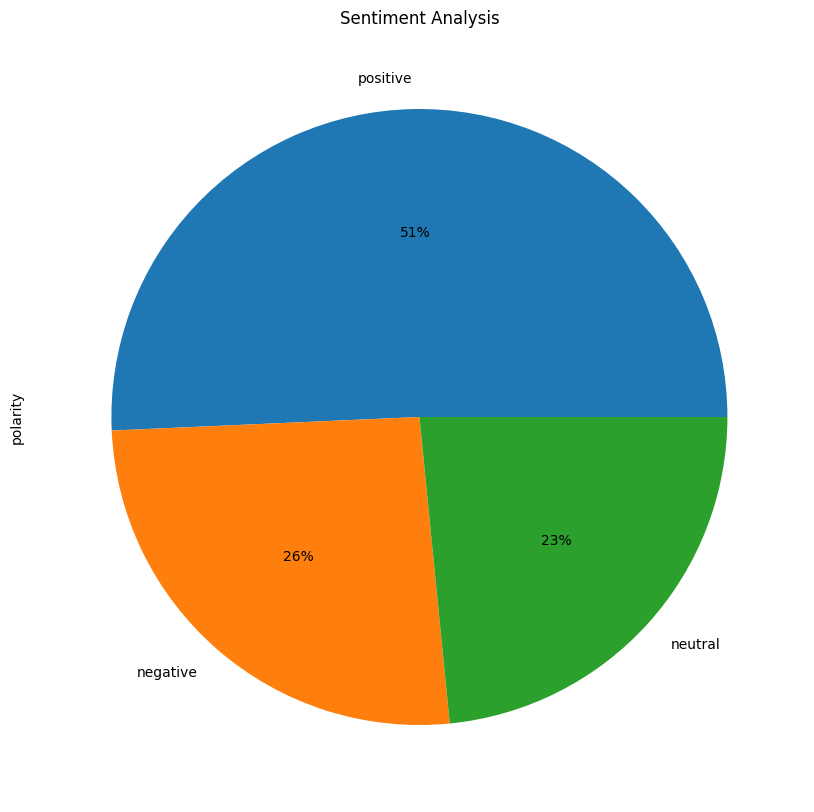

In [22]:
#pie chart
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
df['polarity'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Sentiment Analysis')
plt.show()


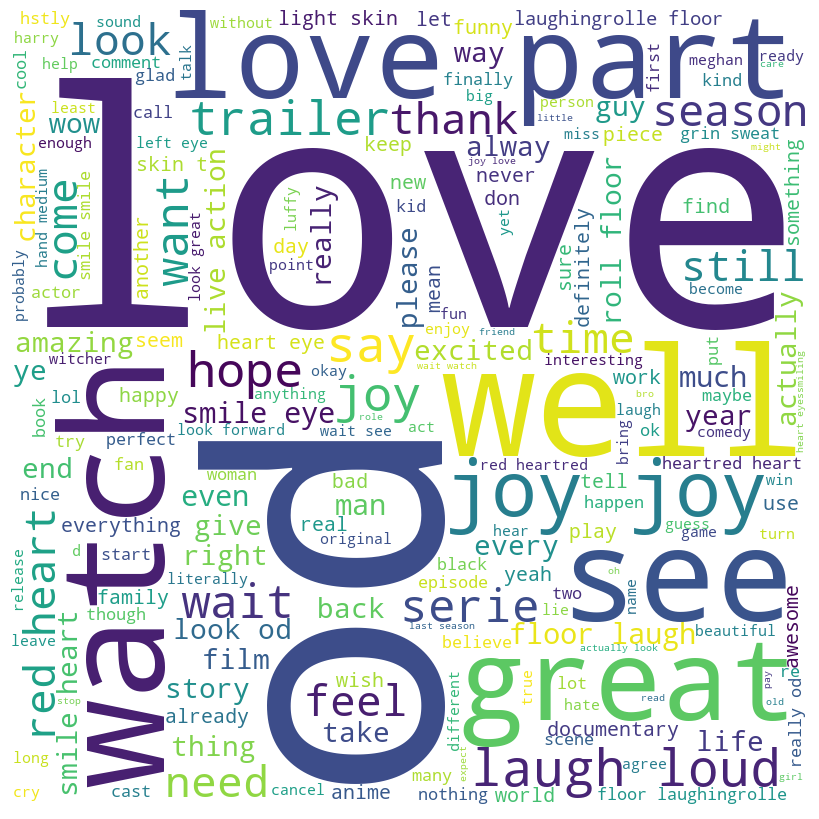

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

comment_words = ' '
for val in df[df['polarity'] == 'positive']['Comment']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    for words in tokens:
        comment_words = comment_words + words + ' '

# Loại bỏ từ cụ thể khỏi chuỗi comment_words
words_to_remove = ["go", "make", "show", "one", "think", "people", "know", "netflix", "shit","movie", "face","tear"]
for word in words_to_remove:
    comment_words = comment_words.replace(word, '')

wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(comment_words)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


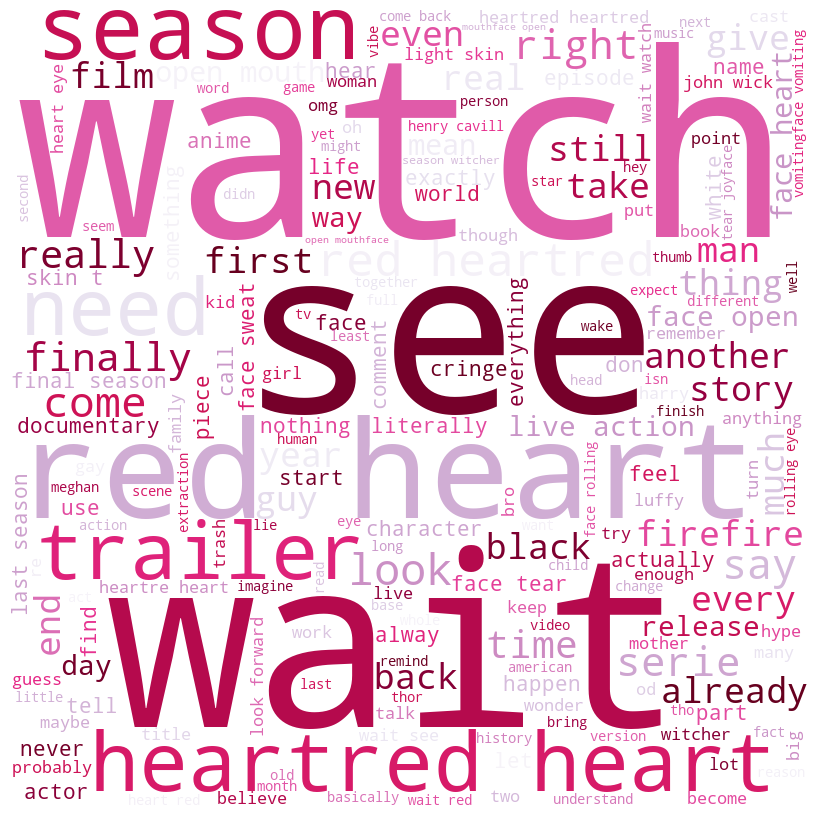

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

comment_words = ' '
for val in df[df['polarity'] == 'neutral']['Comment']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    for words in tokens:
        comment_words = comment_words + words + ' '

# Loại bỏ từ cụ thể khỏi chuỗi comment_words
words_to_remove = ["go", "make", "show", "one", "think", "people", "know", "netflix", "shit","movie"]
for word in words_to_remove:
    comment_words = comment_words.replace(word, '')

wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(comment_words)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud.recolor(colormap='PuRd', random_state=17))
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


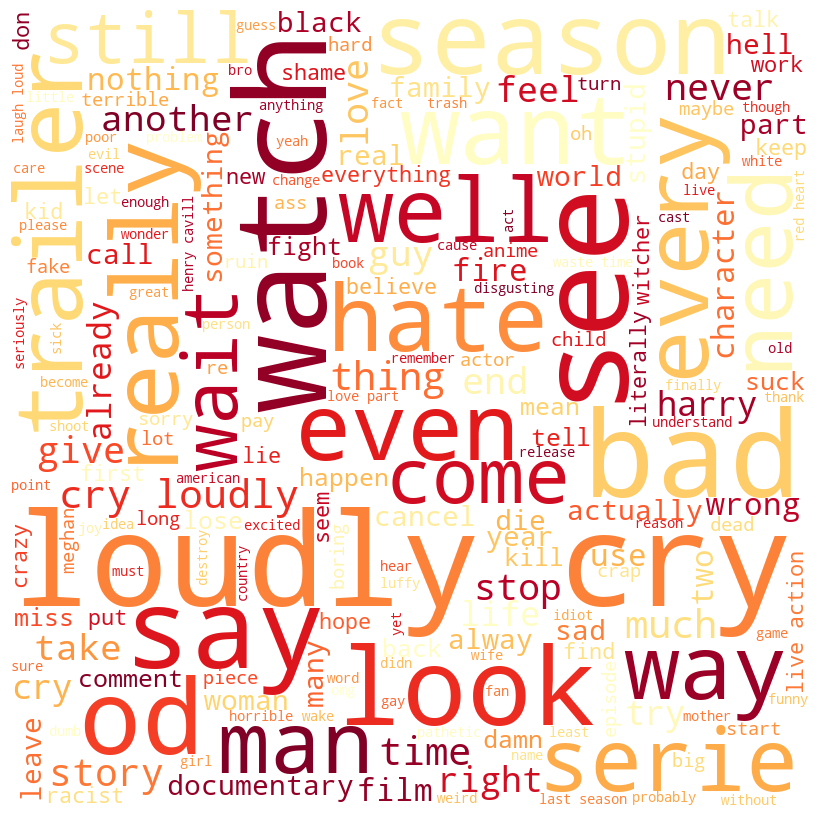

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

comment_words = ' '
for val in df[df['polarity'] == 'negative']['Comment']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    for words in tokens:
        comment_words = comment_words + words + ' '

# Loại bỏ từ cụ thể khỏi chuỗi comment_words
words_to_remove = ["go", "make", "show", "one", "think", "people", "know", "netflix", "shit","movie", "face","tear"]
for word in words_to_remove:
    comment_words = comment_words.replace(word, '')

wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(comment_words)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud.recolor(colormap='YlOrRd', random_state=17))
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
